In [1]:
pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 61.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 67.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 49.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 72.8 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 75.5 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 70.1 MB/s eta 0:00:0000:01:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 8.6 MB/s eta

## Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import Sequential
import os
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


print(f"tensorflow version {tf.__version__}")
print(f"keras version {keras.__version__}")

2024-01-11 08:46:00.428075: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-11 08:46:00.494611: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-11 08:46:00.494661: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-11 08:46:00.496428: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-11 08:46:00.505783: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-11 08:46:00.506348: I tensorflow/core/platform/cpu_feature_guard.cc:1

tensorflow version 2.15.0
keras version 2.15.0


## Q2. Load the Wine Quality dataset and explore its dimensions.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/79Aniket/79Aniket/main/wine.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


## Q3. Check for null values, identify categorical variables, and encode them.

In [3]:
## Check for null valu
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [5]:
df.duplicated().sum()

240

In [6]:
df.shape

(1599, 12)

In [7]:
df = df.drop_duplicates(keep='first')

In [8]:
df.duplicated(keep=False)
df.shape

(1359, 12)

In [9]:
# Quality is the only column which needs to be encoded
df['quality'].unique()

array(['bad', 'good'], dtype=object)

In [10]:
mapping_values = {"bad" : 0, "good" : 1}

In [11]:
df['quality'] = df['quality'].map(mapping_values)

In [12]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0
10,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,0


In [13]:
df["quality"].value_counts()

1    719
0    640
Name: quality, dtype: int64

## Q.4.Separate the features and target variables from the dataframe.

In [14]:
X = df.drop(labels=["quality"],axis=1)
y = df["quality"]

In [15]:
X.shape , y.shape

((1359, 11), (1359,))

##  Q5. Perform a train-test split and divide the data into training, validation, and test datasets.

In [16]:
from sklearn.model_selection import train_test_split

#Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)
#Further splitting the training data into training and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [17]:
X_train.shape , y_train.shape

((815, 11), (815,))

In [18]:
X_test.shape , y_test.shape

((272, 11), (272,))

In [19]:
X_val.shape , y_val.shape

((272, 11), (272,))

## Q6. Perform scaling on the dataset.

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

# Q7. Create at least 2 hidden layers and an output layer for the binary categorical variables.

In [21]:
from tensorflow.keras.layers import Input, Dense

#Creating layers of ANN
LAYERS = [keras.layers.Input(shape = X_train.shape[1:],name="InputLayer"),
          keras.layers.Dense(200,activation='relu',name="HiddenLayer1"),
          keras.layers.Dense(100,activation='relu',name="HiddenLayer2"),
          keras.layers.Dense(1,activation='sigmoid',name="OutputLayer")
          ]

# Q8. Create a Sequential model and add all the layers to it.

In [22]:
model_clf = keras.models.Sequential(LAYERS)

In [23]:
model_clf.layers

In [24]:
LOSS_FUNCTION = "binary_crossentropy"
OPTIMIZER = "Adam"
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

## Q9. Implement a TensorBoard callback to visualize and monitor the model's training process.

In [26]:
from tensorflow.keras.callbacks import TensorBoard

# Create a TensorBoard callback
tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)
#tensorboard_callback = keras.callbacks.TensorBoard(log_dir="logs")

# Fit the model with the TensorBoard callback
model_clf.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[tensorboard_callback])

Epoch 1/50
26/26 [==============================] - 0s 8ms/step - loss: 0.4387 - accuracy: 0.7926 - val_loss: 0.5289 - val_accuracy: 0.7426
Epoch 2/50
26/26 [==============================] - 0s 6ms/step - loss: 0.4304 - accuracy: 0.8025 - val_loss: 0.5252 - val_accuracy: 0.7426
Epoch 3/50
26/26 [==============================] - 0s 6ms/step - loss: 0.4217 - accuracy: 0.8074 - val_loss: 0.5287 - val_accuracy: 0.7500
Epoch 4/50
26/26 [==============================] - 0s 6ms/step - loss: 0.4199 - accuracy: 0.7975 - val_loss: 0.5323 - val_accuracy: 0.7390
Epoch 5/50
26/26 [==============================] - 0s 6ms/step - loss: 0.4152 - accuracy: 0.8049 - val_loss: 0.5280 - val_accuracy: 0.7537
Epoch 6/50
26/26 [==============================] - 0s 6ms/step - loss: 0.4043 - accuracy: 0.8147 - val_loss: 0.5355 - val_accuracy: 0.7500
Epoch 7/50
26/26 [==============================] - 0s 6ms/step - loss: 0.4019 - accuracy: 0.8196 - val_loss: 0.5296 - val_accuracy: 0.7390
Epoch 8/50
26/26 [==

## Q10. Use Early Stopping to prevent overfitting by monitoring a chosen metric and stopping the training if no improvement is observed.

In [27]:
# Create a Early Stopping callback
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

# Fit the model with the Early Stopping callback
model_clf.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks=[early_stopping_cb])

Epoch 1/10
26/26 [==============================] - 0s 6ms/step - loss: 0.1846 - accuracy: 0.9374 - val_loss: 0.8005 - val_accuracy: 0.7243
Epoch 2/10
26/26 [==============================] - 0s 4ms/step - loss: 0.1982 - accuracy: 0.9252 - val_loss: 0.7881 - val_accuracy: 0.7206
Epoch 3/10
26/26 [==============================] - 0s 4ms/step - loss: 0.1681 - accuracy: 0.9411 - val_loss: 0.8012 - val_accuracy: 0.7426
Epoch 4/10
26/26 [==============================] - 0s 4ms/step - loss: 0.1633 - accuracy: 0.9448 - val_loss: 0.7663 - val_accuracy: 0.7537
Epoch 5/10
26/26 [==============================] - 0s 4ms/step - loss: 0.1613 - accuracy: 0.9460 - val_loss: 0.7917 - val_accuracy: 0.7243
Epoch 6/10
26/26 [==============================] - 0s 4ms/step - loss: 0.1487 - accuracy: 0.9607 - val_loss: 0.8131 - val_accuracy: 0.7353
Epoch 7/10
26/26 [==============================] - 0s 4ms/step - loss: 0.1647 - accuracy: 0.9374 - val_loss: 0.7983 - val_accuracy: 0.7610
Epoch 8/10
26/26 [==

## Q11. Implement a ModelCheckpoint callback to save the best model based on a chosen metric during training.

In [28]:
# Create a ModelCheckpoint callback
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

# Fit the model with the Early Stopping callback
model_clf.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks=[checkpoint_cb])

Epoch 1/10
26/26 [==============================] - 0s 7ms/step - loss: 0.1500 - accuracy: 0.9546 - val_loss: 0.7878 - val_accuracy: 0.7574
Epoch 2/10
26/26 [==============================] - 0s 3ms/step - loss: 0.1549 - accuracy: 0.9485 - val_loss: 0.8175 - val_accuracy: 0.7500
Epoch 3/10
26/26 [==============================] - 0s 4ms/step - loss: 0.1472 - accuracy: 0.9497 - val_loss: 0.8304 - val_accuracy: 0.7279
Epoch 4/10
26/26 [==============================] - 0s 3ms/step - loss: 0.1391 - accuracy: 0.9632 - val_loss: 0.8243 - val_accuracy: 0.7463
Epoch 5/10
26/26 [==============================] - 0s 4ms/step - loss: 0.1354 - accuracy: 0.9607 - val_loss: 0.8507 - val_accuracy: 0.7353
Epoch 6/10
26/26 [==============================] - 0s 4ms/step - loss: 0.1356 - accuracy: 0.9595 - val_loss: 0.8555 - val_accuracy: 0.7463
Epoch 7/10
26/26 [==============================] - 0s 3ms/step - loss: 0.1410 - accuracy: 0.9583 - val_loss: 0.8656 - val_accuracy: 0.7426
Epoch 8/10
26/26 [==

## Q12. Print the model summary.

In [29]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HiddenLayer1 (Dense)        (None, 200)               2400      
                                                                 
 HiddenLayer2 (Dense)        (None, 100)               20100     
                                                                 
 OutputLayer (Dense)         (None, 1)                 101       
                                                                 
Total params: 22601 (88.29 KB)
Trainable params: 22601 (88.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Q13. Use binary cross-entropy as the loss function, Adam optimizer, and include the metric ['accuracy'].

In [30]:
LOSS_FUNCTION = "binary_crossentropy"
OPTIMIZER = "Adam"
METRICS = ["accuracy"]

## Q14. Compile the model with the specified loss function, optimizer, and metrics.

In [31]:
model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

## Q15. Fit the model to the data, incorporating the TensorBoard, Early Stopping, and ModelCheckpoint callbacks.

In [35]:
CALLBACKS = [early_stopping_cb,early_stopping_cb,checkpoint_cb]
history = model_clf.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks= CALLBACKS )

Epoch 1/10
26/26 [==============================] - 0s 6ms/step - loss: 0.1168 - accuracy: 0.9669 - val_loss: 0.9945 - val_accuracy: 0.7206
Epoch 2/10
26/26 [==============================] - 0s 4ms/step - loss: 0.1098 - accuracy: 0.9669 - val_loss: 1.0073 - val_accuracy: 0.7353
Epoch 3/10
26/26 [==============================] - 0s 4ms/step - loss: 0.0982 - accuracy: 0.9718 - val_loss: 0.9598 - val_accuracy: 0.7279
Epoch 4/10
26/26 [==============================] - 0s 3ms/step - loss: 0.0966 - accuracy: 0.9767 - val_loss: 0.9997 - val_accuracy: 0.7463
Epoch 5/10
26/26 [==============================] - 0s 5ms/step - loss: 0.1003 - accuracy: 0.9767 - val_loss: 1.0030 - val_accuracy: 0.7390


## Q16. Get the model's parameters.

In [36]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 26}

## Q17. Store the model's training history as a Pandas DataFrame.

In [37]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.116839,0.966871,0.994482,0.720588
1,0.109765,0.966871,1.007289,0.735294
2,0.098249,0.971779,0.959846,0.727941
3,0.096595,0.976687,0.999691,0.746324
4,0.100292,0.976687,1.002952,0.738971


## Q18. Plot the model's training history.

<AxesSubplot: >

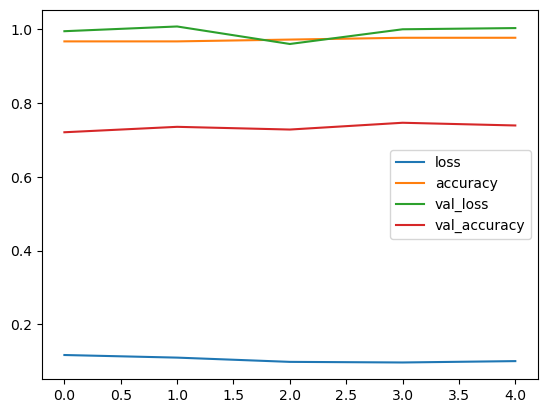

In [38]:
pd.DataFrame(history.history).plot()

## Q19. Evaluate the model's performance using the test data.

In [39]:
model_clf.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 0.9187 - accuracy: 0.6985


[0.9186752438545227, 0.6985294222831726]

In [40]:
x_new = X_test[:10]

In [41]:
actual = y_test[:10]
actual

55      0
1291    1
1544    1
593     0
1261    0
491     1
1004    0
889     0
1154    1
824     0
Name: quality, dtype: int64

In [42]:
y_prob = model_clf.predict(x_new)
y_prob

1/1 [==============================] - 0s 102ms/step


array([[1.5301738e-03],
       [9.9927676e-01],
       [9.9999994e-01],
       [4.5559581e-02],
       [8.5324794e-01],
       [9.9999994e-01],
       [3.4621712e-02],
       [4.5543964e-04],
       [9.9869567e-01],
       [1.5015076e-01]], dtype=float32)

In [43]:
y_prob.round(3)

array([[0.002],
       [0.999],
       [1.   ],
       [0.046],
       [0.853],
       [1.   ],
       [0.035],
       [0.   ],
       [0.999],
       [0.15 ]], dtype=float32)

In [44]:
# Predict with threshold set as 0.5
thr = 0.5
ypred = []
for i in y_prob:
    if i>=0.5:
        ypred.append(1)
    else:
        ypred.append(0)

In [45]:
actual

55      0
1291    1
1544    1
593     0
1261    0
491     1
1004    0
889     0
1154    1
824     0
Name: quality, dtype: int64

In [46]:
ypred

[0, 1, 1, 0, 1, 1, 0, 0, 1, 0]

In [47]:
actual = list(actual)
actual

[0, 1, 1, 0, 0, 1, 0, 0, 1, 0]

## The actual and predicted values are very close indicating our model created is good